## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata.merge(study_results, how = "left", on = "Mouse ID")

# Display the data table for preview
mm = mouse_metadata.merge(study_results, how = "left", on = "Mouse ID")
mm

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mi = mm["Mouse ID"].nunique()
mi


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
num_duplicates = mm.duplicated(["Mouse ID","Timepoint"]).sum()

In [4]:
mm[mm.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# applying a filter on the dataframe
mm[mm['Age_months'] >= 20]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dD = mm[mm.duplicated(["Mouse ID","Timepoint"])]
dD

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
cmd = mm.drop_duplicates(["Mouse ID","Timepoint"])
cmd

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
cmd["Mouse ID"].nunique()


249

## Summary Statistics

In [10]:
cmd['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Measure : tumor volume
# dimension : Drug Regimen

# Steps: 
# 1. Extract only Drug Regimen and Tumor Volume (mm3) from cmd (cleaned mouse dataframe)
# 2. Group by Drug Regimen
# 3. Calculate statitics on tumor volume

In [12]:
# 1,2,3,4,50000 
# mean (average) = sum(1,2,3,4,5)/num of items = 15/5 = 3  

# 50010/3 = zxxx

In [13]:
# Median : central point of the dataset
#     1,2,3,4,50000 = number of items is 5 : median is 3
    
#     5, 7, 8, 9, 10, 11 :- 8+9/2 = 8.5

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
smd = cmd[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])
smd

In [15]:
mD = smd.mean()
mD

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.393463
Ramicane,40.216745
Stelasyn,54.233149


In [16]:
mmD = smd.median()
mmD 

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [17]:
vv = smd.var()
vv

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.138803
Ramicane,23.486704
Stelasyn,59.450562


In [18]:
sd = smd.std()
sd

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.568014
Ramicane,4.846308
Stelasyn,7.710419


In [19]:
sm = smd.sem()
sm

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.525862
Ramicane,0.320955
Stelasyn,0.573111


In [20]:
dR = pd.concat([mD, mmD, vv, sd , sm],axis = 1)

In [21]:
dR.columns = ['Mean tumor volume','Median tumor volume','Varance of tumor volume','STD of tumor volume', 'SEM of tumor volume']
dR

,Mean tumor volume,Median tumor volume,Varance of tumor volume,STD of tumor volume,SEM of tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [22]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
gs = cmd[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"] })
gs


# This method produces everything in a single groupby function





Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [24]:
cmd.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [25]:
pull = cmd[['Mouse ID', 'Drug Regimen']].groupby("Drug Regimen").count().reset_index()
pull



,Drug Regimen,Mouse ID
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,156
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


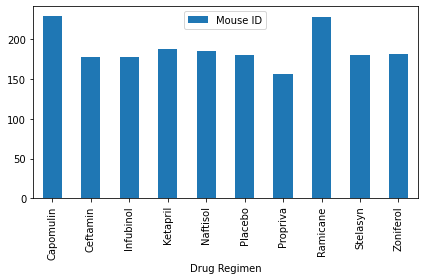

In [26]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bp = pull.plot(x = "Drug Regimen",y = "Mouse ID", kind = "bar")

# gca : get current plot / figure
plt.gca()

#tight_layout sets proper margin and spacing
plt.tight_layout()

#savefig : save it to a image file
plt.savefig("fromPandas.png")

# show : display plot to standard output (screen)
plt.show()

['blue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray']


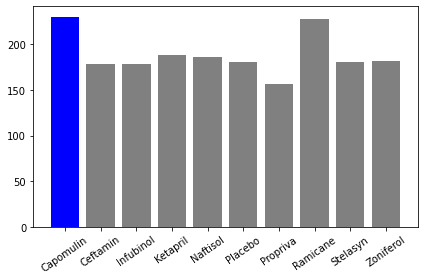

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
colors = ['blue']+['gray']*9
print(colors)

plt.bar(pull["Drug Regimen"], pull[ "Mouse ID"], color=colors)
plt.xticks(rotation='35')
plt.tight_layout()
plt.savefig("pyplot.png")
plt.show()


In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mg = cmd[['Mouse ID', 'Sex']].groupby("Sex").count().reset_index()
# labels for pie
pies = mg['Sex']

#values for pie

pie_votes = mg['Mouse ID']

colors = ["yellow","green"]

explode = (.0, .0)


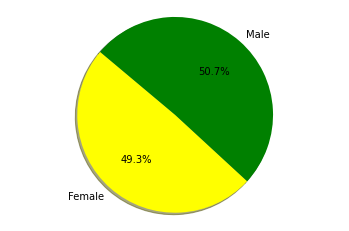

In [29]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_votes, labels=pies, colors=colors, explode = explode, autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()

In [30]:
mg.set_index('Sex', inplace = True)

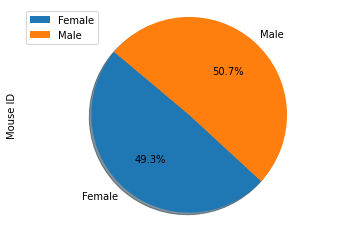

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mg.plot( y = "Mouse ID", kind = "pie" , autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyPies.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
best_regimes = cmd[cmd["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [33]:
# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cmd.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

sorted_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [34]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
bySurvival = cmd.pivot_table(values='Mouse ID', index = 'Timepoint', columns='Drug Regimen', aggfunc='count')
bySurvival




Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,24,25
5,25,21,25,23,23,24,24,25,23,24
10,25,20,21,22,21,24,22,24,21,22
15,24,19,21,19,21,20,16,24,21,21
20,23,18,20,19,20,19,16,23,19,17
25,22,18,18,19,18,17,14,23,18,16
30,22,16,17,18,15,15,13,23,17,15
35,22,14,12,17,15,14,10,21,15,14
40,21,14,10,15,15,12,9,20,12,14


In [35]:
# Start by getting the last (greatest) timepoint for each mouse
sorted_df = cmd.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

sorted_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [36]:
# Capomulin, Ramicane, Infubinol, and Ceftamin
cp = cmd.loc[cmd['Drug Regimen']=="Capomulin","Tumor Volume (mm3)"]
ram = cmd.loc[cmd['Drug Regimen']=="Ramicane","Tumor Volume (mm3)"]
inf = cmd.loc[cmd['Drug Regimen']=="Infubinol","Tumor Volume (mm3)"]
cef = cmd.loc[cmd['Drug Regimen']=="Ceftamin","Tumor Volume (mm3)"]
print(cp)
print(ram)
print(inf)
print(cef)




10      45.000000
11      43.878496
12      37.614948
13      38.177232
14      36.866876
          ...    
440     47.685963
1452    45.000000
1453    45.597064
1454    46.059608
1455    46.539206
Name: Tumor Volume (mm3), Length: 230, dtype: float64
0      45.000000
1      38.825898
2      35.014271
3      34.223992
4      32.997729
         ...    
449    43.166373
450    45.000000
451    45.877545
452    46.378092
453    44.183451
Name: Tumor Volume (mm3), Length: 228, dtype: float64
454     45.000000
455     48.508468
456     51.852437
457     52.777870
458     55.173336
          ...    
1868    54.316407
1869    56.286750
1870    58.628399
1871    60.053740
1872    62.754451
Name: Tumor Volume (mm3), Length: 178, dtype: float64
484     45.000000
485     46.795257
486     47.371343
487     49.734404
488     50.513437
          ...    
1851    57.173538
1852    59.033275
1853    61.153140
1854    63.469549
1855    64.729837
Name: Tumor Volume (mm3), Length: 178, dtype: float64


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)


quart = cp.quantile([0.25, 0.5, 0.75])


print("Campomulin Quartile values : ", quart)

iqr = quart[0.75] - quart[0.25]
print("Campomulin IQR : ", iqr)


lowest_value = quart[0.25] - 1.5 *iqr 
highest_value = quart[0.25] + 1.5 *iqr 

print("Campomulin Lowest and highest is ",  lowest_value, highest_value)
#--------------------------------------------------------------------------------------------

quart = ram.quantile([0.25, 0.5, 0.75])


print("Ramicane Quartile values : ", quart)

iqr = quart[0.75] - quart[0.25]
print("Ramicane IQR : ", iqr)


lowest_value = quart[0.25] - 1.5 *iqr 
highest_value = quart[0.25] + 1.5 *iqr 

print("Ramicane Lowest and highest is ",  lowest_value, highest_value)
#--------------------------------------------------------------------------------------------
quart = inf.quantile([0.25, 0.5, 0.75])


print("Infubinol Quartile values : ", quart)

iqr = quart[0.75] - quart[0.25]
print("Infubinol IQR : ", iqr)


lowest_value = quart[0.25] - 1.5 *iqr 
highest_value = quart[0.25] + 1.5 *iqr 

print("Infubinol Lowest and highest is ",  lowest_value, highest_value)
#-------------------------------------------------------------------------------------------
quart = cef.quantile([0.25, 0.5, 0.75])


print("Ceftamin Quartile values : ", quart)

iqr = quart[0.75] - quart[0.25]
print("Ceftamin IQR : ", iqr)


lowest_value = quart[0.25] - 1.5 *iqr 
highest_value = quart[0.25] + 1.5 *iqr 

print("Ceftamin Lowest and highest is ",  lowest_value, highest_value)

Campomulin Quartile values :  0.25    37.685933
0.50    41.557809
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
Campomulin IQR :  7.314067135000002
Campomulin Lowest and highest is  26.714832162499995 48.6570335675
Ramicane Quartile values :  0.25    36.674635
0.50    40.673236
0.75    45.000000
Name: Tumor Volume (mm3), dtype: float64
Ramicane IQR :  8.325365415000007
Ramicane Lowest and highest is  24.18658646249998 49.162682707500004
Infubinol Quartile values :  0.25    47.312353
0.50    51.820584
0.75    57.314444
Name: Tumor Volume (mm3), dtype: float64
Infubinol IQR :  10.002090667500006
Infubinol Lowest and highest is  32.309217298749985 62.31548930125001
Ceftamin Quartile values :  0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64
Ceftamin IQR :  9.5930104575
Ceftamin Lowest and highest is  32.818911426250004 61.597942798750005


<module 'matplotlib.pyplot' from 'C:\\Users\\Fransisco Garcia\\anaconda3\\envs\\PythonData\\lib\\site-packages\\matplotlib\\pyplot.py'>

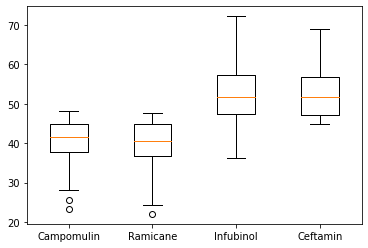

In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot = plt.boxplot([cp , ram, inf, cef], labels = ["Campomulin" , "Ramicane", "Infubinol" , "Ceftamin"]  )

plt






## Line and Scatter Plots

In [46]:
cmd.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Steps followed:
1. Extracted only data for drug Capomulin and mouse id s185
2. created 2 variavles x & y : x = timepoint and y = tumor volume
3. Used plt.plot and passed the x and y

In [49]:
#Step 1- Extract data for only one mouse and one drug
cp = cmd[(cmd['Drug Regimen']=="Capomulin") & (cmd['Mouse ID'] == 's185')]
cp


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


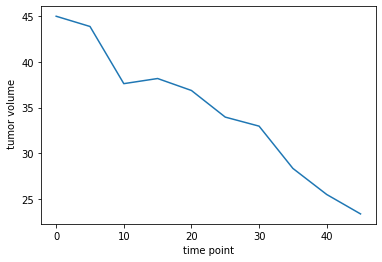

In [50]:
#step2: extract x and y axis values
x_axis = cp['Timepoint']
y_axis = cp["Tumor Volume (mm3)"]

#step3: plot using plt.plot
linePlot = plt.plot(x_axis, y_axis)
plt.ylabel(" tumor volume")
plt.xlabel("time point")
plt.show()

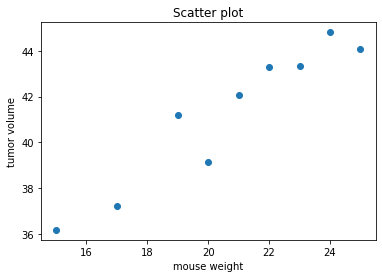

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cp = cmd[(cmd['Drug Regimen']=="Capomulin")]
cp = cp [["Weight (g)","Tumor Volume (mm3)"]].groupby("Weight (g)").mean().reset_index()
cp

# use plot.scatter for this cell

scatterPlot = plt.scatter(x= cp["Weight (g)"], y= cp["Tumor Volume (mm3)"])
plt.title('Scatter plot')
plt.xlabel('mouse weight')
plt.ylabel('tumor volume')
plt.show()




## Correlation and Regression

In [61]:
cp

,Weight (g),Tumor Volume (mm3)
0,15,36.182040
1,17,37.214133
2,19,41.182391
3,20,39.141053
4,21,42.088700
5,22,43.288490
6,23,43.341051
7,24,44.805810
8,25,44.062109


In [60]:
# Calculate the correlation coefficient and linear regression model
cp.corr(method='pearson')



# for mouse weight and average tumor volume for the Capomulin regimen


,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.950524
Tumor Volume (mm3),0.950524,1.000000


In [62]:
from scipy import stats

In [63]:
slope, intercept, r_value, p_value, std_err = stats.linregress(cp["Weight (g)"], cp["Tumor Volume (mm3)"])

print("Slope", slope)
print("intercept", intercept)

Slope 0.894772609734063
intercept 22.764229983591896
